## Processing the Input dataset from BindingDB

In [15]:
import pandas as pd
# List of cathepsins
cathepsins = ["B", "S", "D", "K"]

### Keeping only the relevant columns

In [16]:
# Relevant columns to keep
columns_to_keep = [
    "Target Name", "IC50 (nM)", "Target Source Organism According to Curator or DataSource", "Ligand SMILES"
]

# Loop through each cathepsin type
for cat in cathepsins:
    input_file = f"./bindingdb_initial/cat{cat}_bindingdb.tsv"
    output_file = f"./Intermediate_bindingdb/CAT {cat}/Limited_Columns_data_{cat}.tsv"

    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Filter the relevant columns
    df_filtered = df[columns_to_keep]

    # Save the filtered data
    df_filtered.to_csv(output_file, sep='\t', index=False)

    print(f"Processed {input_file} and saved to {output_file}")


Processed ./bindingdb_initial/catB_bindingdb.tsv and saved to ./Intermediate_bindingdb/CAT B/Limited_Columns_data_B.tsv
Processed ./bindingdb_initial/catS_bindingdb.tsv and saved to ./Intermediate_bindingdb/CAT S/Limited_Columns_data_S.tsv
Processed ./bindingdb_initial/catD_bindingdb.tsv and saved to ./Intermediate_bindingdb/CAT D/Limited_Columns_data_D.tsv
Processed ./bindingdb_initial/catK_bindingdb.tsv and saved to ./Intermediate_bindingdb/CAT K/Limited_Columns_data_K.tsv


### Checking for Missing IC50 Values

In [17]:
# Loop through each dataset and check for missing IC50 values
for cat in cathepsins:
    input_file = f"./Intermediate_bindingdb/CAT {cat}/Limited_Columns_data_{cat}.tsv"
    
    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Check for missing values in 'IC50 (nM)' column
    missing_ic50 = df['IC50 (nM)'].isna().sum()
    non_missing_ic50 = df['IC50 (nM)'].notna().sum()

    print(f"Dataset: {input_file}")
    print(f"Rows with missing IC50 values: {missing_ic50}")
    print(f"Rows with non-missing IC50 values: {non_missing_ic50}")
    print("-" * 50)


Dataset: ./Intermediate_bindingdb/CAT B/Limited_Columns_data_B.tsv
Rows with missing IC50 values: 1395
Rows with non-missing IC50 values: 1613
--------------------------------------------------
Dataset: ./Intermediate_bindingdb/CAT S/Limited_Columns_data_S.tsv
Rows with missing IC50 values: 772
Rows with non-missing IC50 values: 2573
--------------------------------------------------
Dataset: ./Intermediate_bindingdb/CAT D/Limited_Columns_data_D.tsv
Rows with missing IC50 values: 474
Rows with non-missing IC50 values: 3965
--------------------------------------------------
Dataset: ./Intermediate_bindingdb/CAT K/Limited_Columns_data_K.tsv
Rows with missing IC50 values: 891
Rows with non-missing IC50 values: 2114
--------------------------------------------------


### Removing Missing IC50 values

In [18]:
# Loop through each dataset to clean missing IC50 values
for cat in cathepsins:
    input_file = f"./Intermediate_bindingdb/CAT {cat}/Limited_Columns_data_{cat}.tsv"
    output_file = f"./Intermediate_bindingdb/CAT {cat}/IC50_cleaned_{cat}.tsv"

    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Remove rows with missing values in 'IC50 (nM)' column
    df_clean = df.dropna(subset=['IC50 (nM)'])

    # Save the cleaned data
    df_clean.to_csv(output_file, sep='\t', index=False)

    # Check the number of rows removed
    removed_rows = df.shape[0] - df_clean.shape[0]

    print(f"Processed {input_file}")
    print(f"Rows removed due to missing IC50 values: {removed_rows}")
    print(f"Rows remaining after cleaning: {df_clean.shape[0]}")
    print("-" * 50)


Processed ./Intermediate_bindingdb/CAT B/Limited_Columns_data_B.tsv
Rows removed due to missing IC50 values: 1395
Rows remaining after cleaning: 1613
--------------------------------------------------
Processed ./Intermediate_bindingdb/CAT S/Limited_Columns_data_S.tsv
Rows removed due to missing IC50 values: 772
Rows remaining after cleaning: 2573
--------------------------------------------------
Processed ./Intermediate_bindingdb/CAT D/Limited_Columns_data_D.tsv
Rows removed due to missing IC50 values: 474
Rows remaining after cleaning: 3965
--------------------------------------------------
Processed ./Intermediate_bindingdb/CAT K/Limited_Columns_data_K.tsv
Rows removed due to missing IC50 values: 891
Rows remaining after cleaning: 2114
--------------------------------------------------


### Selecting only Homo-Sapiens data

In [19]:
# Loop through each dataset to keep only Homo sapiens data
for cat in cathepsins:
    input_file = f"./Intermediate_bindingdb/CAT {cat}/IC50_cleaned_{cat}.tsv"
    output_file = f"./Intermediate_bindingdb/CAT {cat}/homo_sapiens_only_data_{cat}.tsv"

    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Filter the dataset for Homo sapiens
    df_homo_sapiens = df[df['Target Source Organism According to Curator or DataSource'] == 'Homo sapiens']

    # Save the filtered DataFrame
    df_homo_sapiens.to_csv(output_file, sep='\t', index=False)

    # Print the number of rows removed
    removed_rows = df.shape[0] - df_homo_sapiens.shape[0]

    print(f"Processed {input_file}")
    print(f"Rows removed (non-Homo sapiens): {removed_rows}")
    print(f"Rows remaining (Homo sapiens only): {df_homo_sapiens.shape[0]}")
    print("-" * 50)


Processed ./Intermediate_bindingdb/CAT B/IC50_cleaned_B.tsv
Rows removed (non-Homo sapiens): 68
Rows remaining (Homo sapiens only): 1545
--------------------------------------------------
Processed ./Intermediate_bindingdb/CAT S/IC50_cleaned_S.tsv
Rows removed (non-Homo sapiens): 62
Rows remaining (Homo sapiens only): 2511
--------------------------------------------------
Processed ./Intermediate_bindingdb/CAT D/IC50_cleaned_D.tsv
Rows removed (non-Homo sapiens): 0
Rows remaining (Homo sapiens only): 3965
--------------------------------------------------
Processed ./Intermediate_bindingdb/CAT K/IC50_cleaned_K.tsv
Rows removed (non-Homo sapiens): 0
Rows remaining (Homo sapiens only): 2114
--------------------------------------------------


### Checking for duplicate ligands

In [20]:
# Loop through each dataset and count unique values in the 'Ligand SMILES' column
for cat in cathepsins:
    input_file = f"./Intermediate_Bindingdb/CAT {cat}/homo_sapiens_only_data_{cat}.tsv"

    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Get the count of unique values in the 'Ligand SMILES' column
    unique_counts = df['Ligand SMILES'].value_counts()

    # Print the counts of unique values
    print(f"Unique Ligand SMILES counts for {input_file}:")
    print(unique_counts)
    print("-" * 50)


Unique Ligand SMILES counts for ./Intermediate_Bindingdb/CAT B/homo_sapiens_only_data_B.tsv:
Ligand SMILES
Nc1cc(OC(=O)c2cccs2)nn1S(=O)(=O)c1ccccc1                                                      13
CCCNC(=O)[C@H]1O[C@@H]1C(=O)N[C@@H]([C@@H](C)CC)C(=O)N1CCC[C@H]1C(O)=O                         5
CC(C)C[C@H](NC(=O)[C@H]1O[C@@H]1C(O)=O)C(=O)NCCCCN=C(N)N                                       5
CC(C)C[C@@H](C(=O)NCC#N)c1cccc(c1)-c1ccc(cc1)N1CCNCC1                                          4
NCCCCC(NC(=O)C1CCCC1)C(=O)COc1cccc(F)c1                                                        4
                                                                                              ..
C[C@@H]1CN(CCN1C(=O)[C@@H]1CCCC[C@H]1C(=O)NC1(CC1)C#N)c1ccccc1                                 1
CCNC(=O)C(=O)C(Cc1ccc(Br)cc1)NC(=O)[C@H](CC(C)C)NC(=O)CCCCC1CCSS1                              1
Cc1cncc(C[C@H](NC(=O)C(c2ccccc2)c2ccccc2)C(=O)NCC#N)c1                                         1
CC(C)(F)C[C@H](N[C@@

### Saving only unique ligands

In [21]:
# Loop through each dataset to drop duplicate Ligand SMILES values
for cat in cathepsins:
    input_file = f"./Intermediate_bindingdb/CAT {cat}/homo_sapiens_only_data_{cat}.tsv"
    output_file = f"./Intermediate_bindingdb/CAT {cat}/unique_ligands_data_{cat}.tsv"

    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Drop duplicate rows based on the 'Ligand SMILES' column
    df_unique_ligands = df.drop_duplicates(subset='Ligand SMILES')

    # Save the dataset with unique ligands
    df_unique_ligands.to_csv(output_file, sep='\t', index=False)

    # Print a message for each dataset
    print(f"The new file with unique ligands for {cat} is saved as '{output_file}'.")


The new file with unique ligands for B is saved as './Intermediate_bindingdb/CAT B/unique_ligands_data_B.tsv'.
The new file with unique ligands for S is saved as './Intermediate_bindingdb/CAT S/unique_ligands_data_S.tsv'.
The new file with unique ligands for D is saved as './Intermediate_bindingdb/CAT D/unique_ligands_data_D.tsv'.
The new file with unique ligands for K is saved as './Intermediate_bindingdb/CAT K/unique_ligands_data_K.tsv'.


In [22]:
# Loop through each dataset and count unique values in the 'Ligand SMILES' column
for cat in cathepsins:
    input_file = f"./Intermediate_Bindingdb/CAT {cat}/unique_ligands_data_{cat}.tsv"

    # Load the dataset
    df = pd.read_csv(input_file, sep='\t')

    # Get the count of unique values in the 'Ligand SMILES' column
    unique_counts = df['Ligand SMILES'].value_counts()

    # Print the counts of unique values
    print(f"Unique Ligand SMILES counts for {input_file}:")
    print(unique_counts)
    print("-" * 50)


Unique Ligand SMILES counts for ./Intermediate_Bindingdb/CAT B/unique_ligands_data_B.tsv:
Ligand SMILES
CCCC(CCC)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C=O                                                                                      1
COC1=CC(=O)N([C@H]1Cc1c[nH]c2ccccc12)C(=O)\C=C\[C@H](CCc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)N(C)C    1
O=C[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC1CCCCC1)NC(=O)c1cc2ccccc2[nH]1                                                            1
COC1=CC(=O)N([C@H]1Cc1c[nH]c2ccccc12)C(=O)\C=C\[C@H](C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC1CCCCC1)NC(=O)C1CCN(C)CC1                1
COC1=CC(=O)N([C@H]1Cc1c[nH]c2ccccc12)C(=O)\C=C\[C@H](C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)C1CCN(C)CC1                   1
                                                                                                                                ..
Cc1cccc(C[C@H](Nc2ccc3COC(=O)c3c2)C(=O)N[C@@H](COCc2ccc(F)c(c2)C(O)=O)C#N)c1                                  

### Adding Potency

In [23]:
# Function to update IC50 values based on the given conditions
def update_ic50(value):
    if isinstance(value, str):
        if value.startswith("<"):
            # For "<" values, decrease by 0.1
            return float(value[1:]) - 0.1
        elif value.startswith(">"):
            # For ">" values, increase by 0.1
            return float(value[1:]) + 0.1
    return float(value)  # Ensure that it's a float value

# Function to categorize based on IC50 values (output as numeric potency)
def categorize_potency(ic50):
    if ic50 < 1:
        return "3"  # Potent
    elif 1 <= ic50 < 100:
        return "2"  # Active
    elif 100 <= ic50 < 1000:
        return "1"  # Intermediate
    elif ic50 >= 1000:
        return "0"  # Inactive
    else:
        return "-1"  # Unknown

def update_ic50_in_tsv(input_file, output_file):
    # Read the TSV file
    df = pd.read_csv(input_file, sep='\t')

    # Update the IC50 column
    df['IC50 (nM)'] = df['IC50 (nM)'].apply(update_ic50)

    # Add Potency column based on updated IC50 values
    df['Potency'] = df['IC50 (nM)'].apply(categorize_potency)

    # Save the updated dataframe to a new TSV file
    df.to_csv(output_file, sep='\t', index=False)

# Loop through each dataset and update IC50 values and potency
for cat in cathepsins:
    input_file = f"./Intermediate_bindingdb/CAT {cat}/unique_ligands_data_{cat}.tsv"
    output_file = f"./Intermediate_bindingdb/CAT {cat}/updated_ic50_with_potency_data_{cat}.tsv"
    
    update_ic50_in_tsv(input_file, output_file)
    print(f"Updated IC50 and potency for {cat}. Saved to '{output_file}'.")


Updated IC50 and potency for B. Saved to './Intermediate_bindingdb/CAT B/updated_ic50_with_potency_data_B.tsv'.
Updated IC50 and potency for S. Saved to './Intermediate_bindingdb/CAT S/updated_ic50_with_potency_data_S.tsv'.
Updated IC50 and potency for D. Saved to './Intermediate_bindingdb/CAT D/updated_ic50_with_potency_data_D.tsv'.
Updated IC50 and potency for K. Saved to './Intermediate_bindingdb/CAT K/updated_ic50_with_potency_data_K.tsv'.


### Plotting

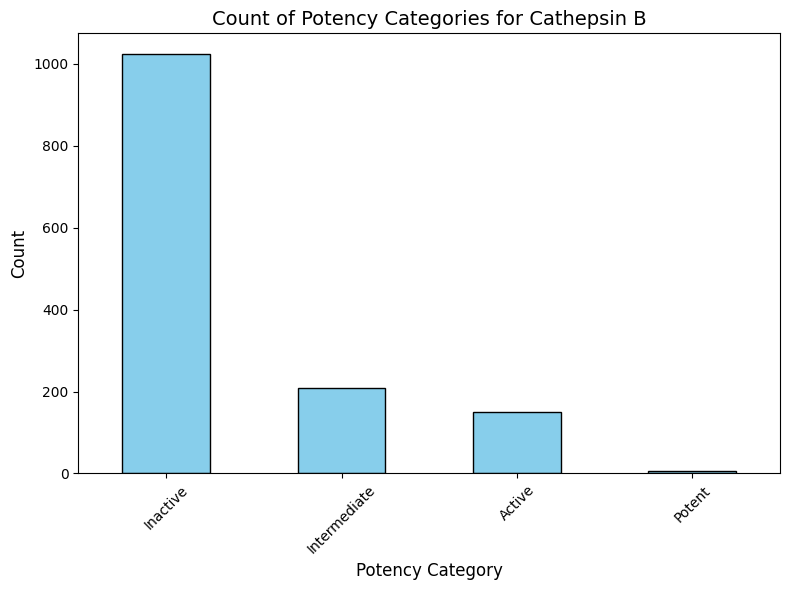

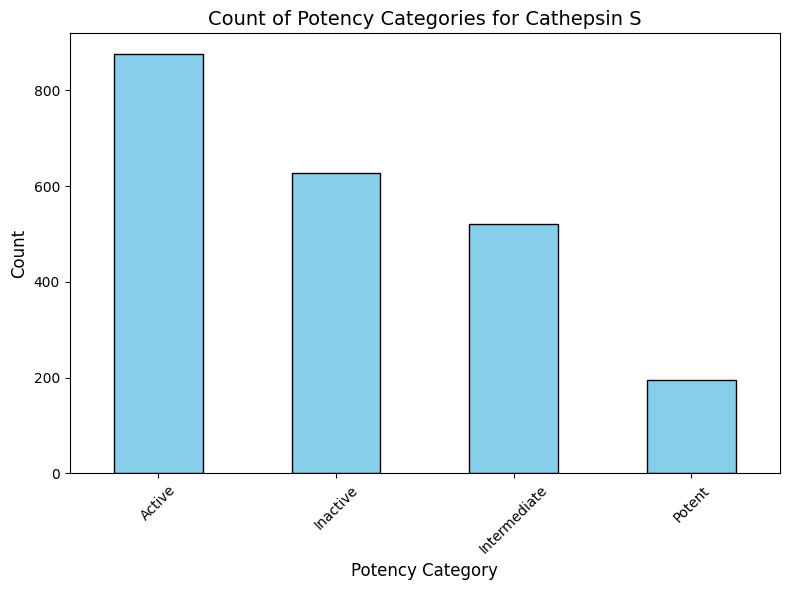

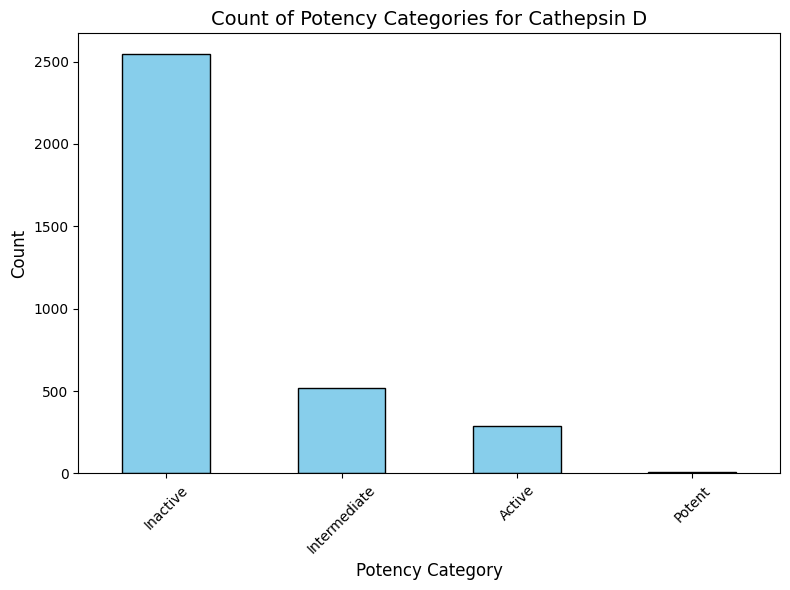

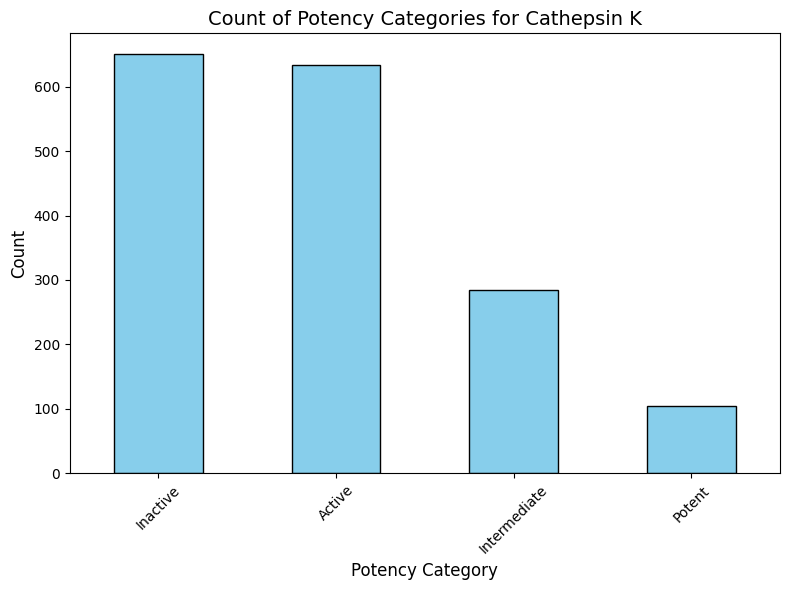

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize based on IC50 values (output as potency categories)
def categorize_potency(ic50):
    if ic50 < 1:
        return "Potent"
    elif 1 <= ic50 < 100:
        return "Active"
    elif 100 <= ic50 < 1000:
        return "Intermediate"
    elif ic50 >= 1000:
        return "Inactive"
    else:
        return "Unknown"


for cat in cathepsins:
    input_file = f"./Intermediate_bindingdb/CAT {cat}/updated_ic50_with_potency_data_{cat}.tsv"
    df = pd.read_csv(input_file, sep='\t')
    df['Potency'] = df['IC50 (nM)'].apply(lambda x: categorize_potency(float(x)))
    potency_counts = df['Potency'].value_counts()
    # Plotting the count of potency categories
    plt.figure(figsize=(8, 6))
    potency_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Count of Potency Categories for Cathepsin {cat}", fontsize=14)
    plt.xlabel('Potency Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


